In [60]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [62]:
X = df.drop('label', axis=1)
y = df['label']
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


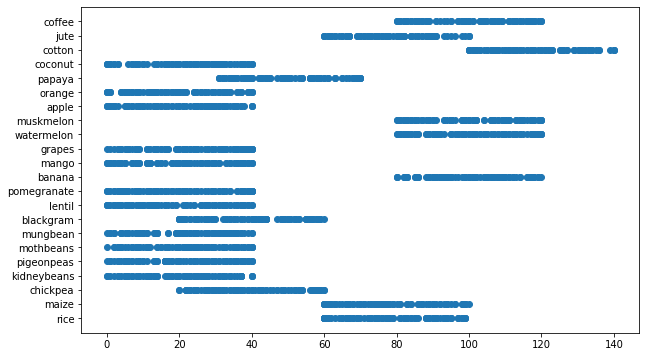

In [63]:
# visualizing N, P, K values 
plt.figure(figsize=(10, 6))
plt.plot(X['N'], y, 'o')

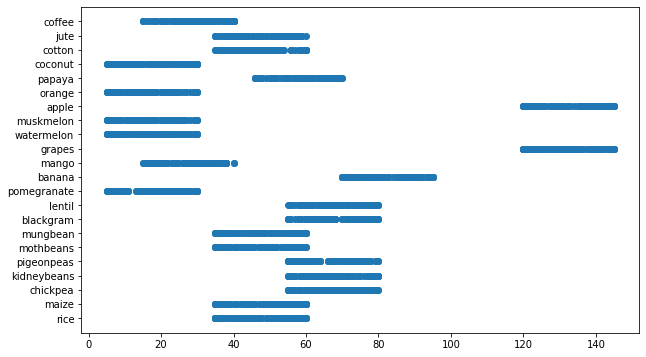

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(X['P'], y, 'o')

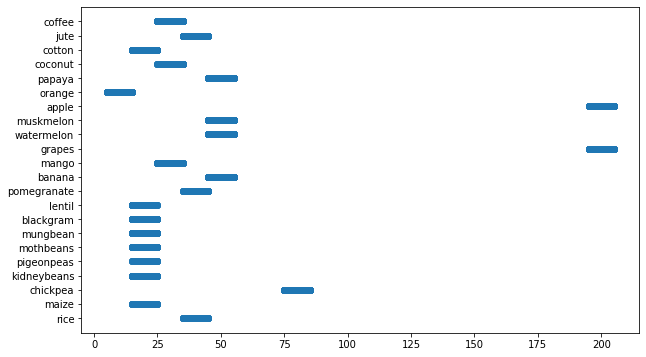

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(X['K'], y, 'o')

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3,
                                                    shuffle = True, random_state = 0)

In [67]:
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

LGBMClassifier()

In [68]:
y_pred = model.predict(X_test)

In [69]:
accuracy = accuracy_score(Y_test, y_pred)
accuracy

0.9893939393939394

In [70]:
y_pred_train = model.predict(X_train)
print(accuracy_score(Y_train, y_pred_train))

1.0


In [71]:
# model score
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

1.0
0.9893939393939394


In [72]:
res = model.predict([[40,72,77,17.02498456,16.98861173,7.485996067,88.55123143]]) # chickpea
res

array(['chickpea'], dtype=object)

In [73]:
res = model.predict([[67,35,22,23.30546753,63.24648023,6.3856842139999985,108.7603001]]) # maize
res

array(['maize'], dtype=object)

In [74]:
# save the model to disk
pickle.dump(model, open('model.pkl', 'wb'))

In [75]:
# give a list of crops
crops = df['label'].unique()
print(crops)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [76]:
# segregate similar crops according to paramaters
# N, P, K, temperature, humidity, ph, rainfall
# if the parameters are in the range of the crop, then it is a similar crop

# get avg N, P, K, temperature, humidity, ph, rainfall for each crop
avg = {}
for crop in crops:
    avg[crop] = df[df['label'] == crop].mean()
    print(crop)
    print(avg[crop])
    
similar_crops = {}
for crop in crops:
    similar_crops[crop] = []
    
    # if the combined value of N, P, K, temperature, humidity, ph, rainfall is in the range of the crop, then it is a similar crop
    for crop2 in crops:
        if crop2 == crop:
            continue
        if 0.9 * (avg[crop]['N'] + avg[crop]['P'] + avg[crop]['K'] + avg[crop]['temperature'] + avg[crop]['humidity'] + avg[crop]['ph'] + avg[crop]['rainfall']) <= (avg[crop2]['N'] + avg[crop2]['P'] + avg[crop2]['K'] + avg[crop2]['temperature'] + avg[crop2]['humidity'] + avg[crop2]['ph'] + avg[crop2]['rainfall']) <= 1.1 * (avg[crop]['N'] + avg[crop]['P'] + avg[crop]['K'] + avg[crop]['temperature'] + avg[crop]['humidity'] + avg[crop]['ph'] + avg[crop]['rainfall']):
            similarity = abs(1 - (avg[crop2]['N'] + avg[crop2]['P'] + avg[crop2]['K'] + avg[crop2]['temperature'] + avg[crop2]['humidity'] + avg[crop2]['ph'] + avg[crop2]['rainfall']) / (avg[crop]['N'] + avg[crop]['P'] + avg[crop]['K'] + avg[crop]['temperature'] + avg[crop]['humidity'] + avg[crop]['ph'] + avg[crop]['rainfall']))
            print(crop, crop2, similarity)
            similar_crops[crop].append((crop2, similarity))
                                        
# order the similar crops according to similarity
for crop in crops:
    similar_crops[crop] = sorted(similar_crops[crop], key=lambda x: x[1])
    print(crop, similar_crops[crop])

rice
N               79.890000
P               47.580000
K               39.870000
temperature     23.689332
humidity        82.272822
ph               6.425471
rainfall       236.181114
dtype: float64
maize
N              77.760000
P              48.440000
K              19.790000
temperature    22.389204
humidity       65.092249
ph              6.245190
rainfall       84.766988
dtype: float64
chickpea
N              40.090000
P              67.790000
K              79.920000
temperature    18.872847
humidity       16.860439
ph              7.336957
rainfall       80.058977
dtype: float64
kidneybeans
N               20.750000
P               67.540000
K               20.050000
temperature     20.115085
humidity        21.605357
ph               5.749411
rainfall       105.919778
dtype: float64
pigeonpeas
N               20.730000
P               67.730000
K               20.290000
temperature     27.741762
humidity        48.061633
ph               5.794175
rainfall       149.457564
d

/tmp/ipykernel_70456/2832917248.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg[crop] = df[df['label'] == crop].mean()
